Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip '/content/gdrive/MyDrive/CNN_assignment.zip'

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
   )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
   )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
type(class_names)

list

In [13]:
num_classes=len(class_names)
num_classes

9

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

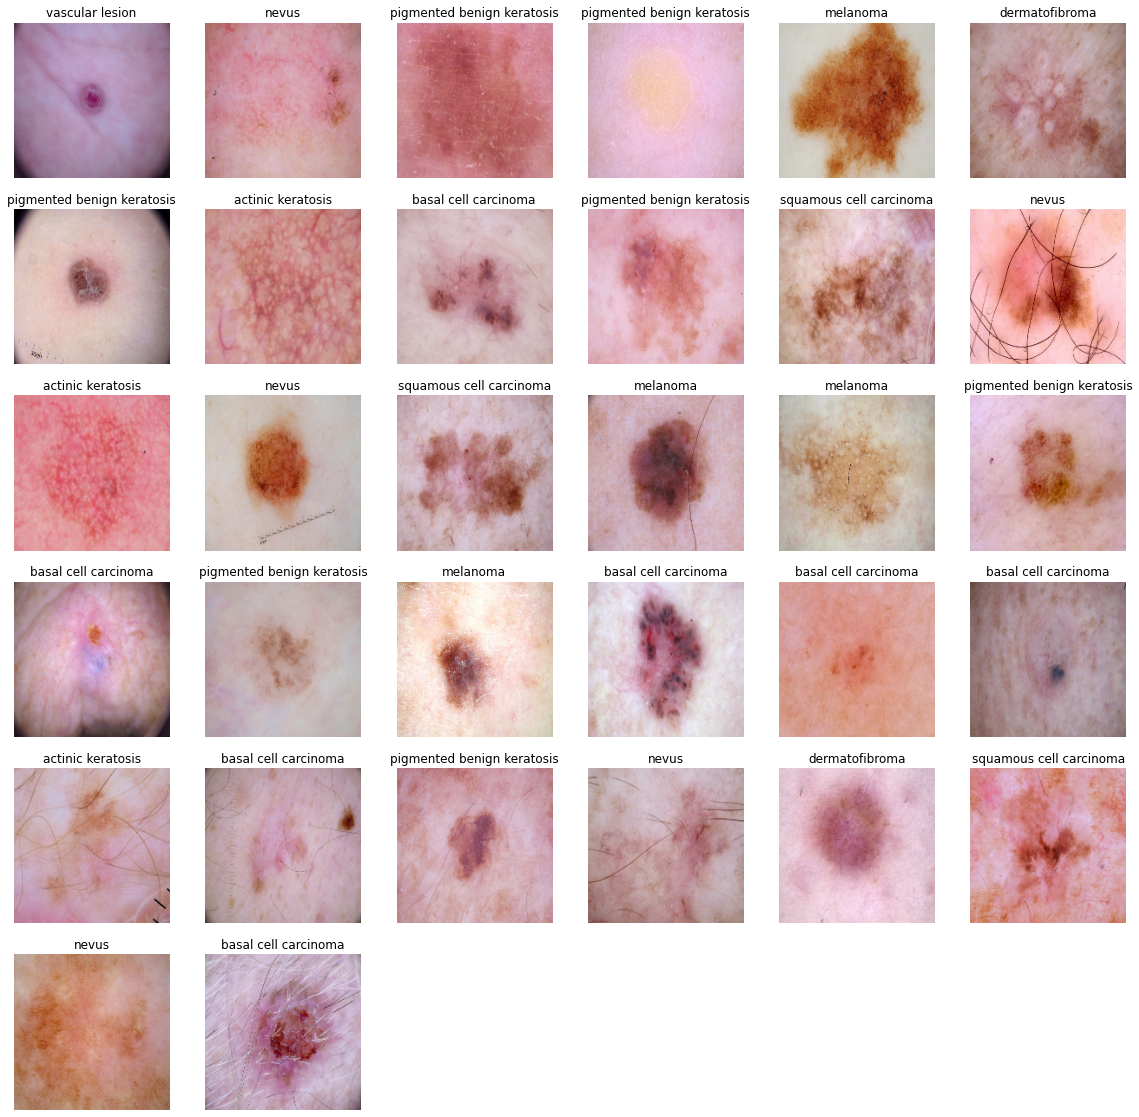

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
model=tf.keras.Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255),
                  layers.Conv2D(16, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dense(128, activation='relu'),
                   layers.Dense(32, activation='relu'),
                  layers.Dense(num_classes,activation='softmax')
                           ])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 58s 1s/step - loss: 2.0537 - accuracy: 0.2204 - val_loss: 1.9158 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.8658 - accuracy: 0.3131 - val_loss: 1.7965 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 55s 978ms/step - loss: 1.6711 - accuracy: 0.4213 - val_loss: 1.6897 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 55s 975ms/step - loss: 1.4994 - accuracy: 0.4872 - val_loss: 1.4662 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 55s 978ms/step - loss: 1.3805 - accuracy: 0.5223 - val_loss: 1.4750 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 55s 975ms/step - loss: 1.2898 - accuracy: 0.5419 - val_loss: 1.5099 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 55s 977ms/step - loss: 1.1901 - accuracy: 0.5781 - val_loss: 1.3950 - val_accuracy: 0.5168
Epoch

### Visualizing training results

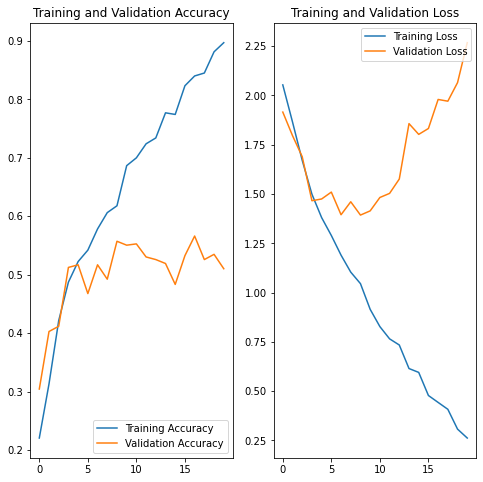

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**The model performs well on the training data set but on the validation data set the accuracy is less.So it is a clear case of model overfit as the validation loss is more than the training loss and validation accuracy is much lesser than the training accuracy**

### Write your findings here

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

first image shape: (180, 180, 3)
Expaned dims of first image:   (1, 180, 180, 3)


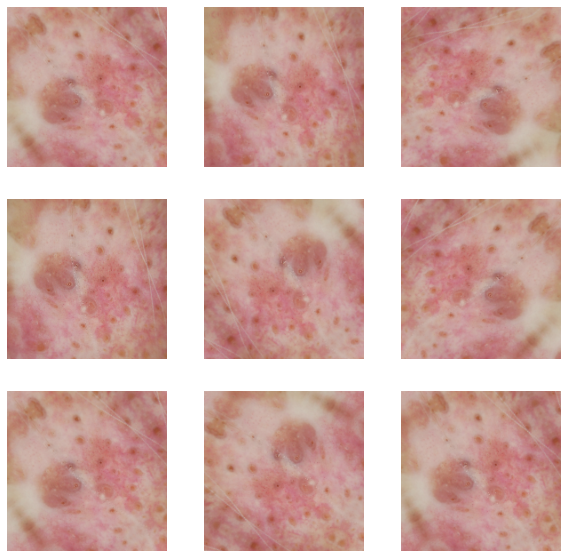

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    first_image = image[0]
    print(f'first image shape: {first_image.shape}')
    expaned_dims_first_image =  tf.expand_dims(first_image, 0)
    print(f'Expaned dims of first image:   {expaned_dims_first_image.shape}')
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        augmented_image=data_augmentation(expaned_dims_first_image)
        
        #rescale augmented_image
        augmented_image = augmented_image[0] / 255
        plt.imshow(augmented_image)
        plt.axis('off')

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model=tf.keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip('horizontal'),
                  layers.experimental.preprocessing.RandomRotation(0.2),
                  layers.experimental.preprocessing.Rescaling(1./255),
                  layers.Conv2D(16, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.Dropout( 0.2), 
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dense(128, activation='relu'),
                  layers.Dropout( 0.2),
                  layers.Dense(32, activation='relu'),
                  layers.Dense(num_classes,activation='softmax')
                           ])


### Compiling the model

In [18]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [55]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
169/169 [==============================] - 237s 1s/step - loss: 1.8662 - accuracy: 0.2834 - val_loss: 1.6764 - val_accuracy: 0.3727
Epoch 2/20
169/169 [==============================] - 229s 1s/step - loss: 1.6067 - accuracy: 0.3854 - val_loss: 1.5431 - val_accuracy: 0.3987
Epoch 3/20
169/169 [==============================] - 215s 1s/step - loss: 1.4874 - accuracy: 0.4292 - val_loss: 1.4406 - val_accuracy: 0.4558
Epoch 4/20
169/169 [==============================] - 212s 1s/step - loss: 1.4201 - accuracy: 0.4488 - val_loss: 1.4180 - val_accuracy: 0.4417
Epoch 5/20
169/169 [==============================] - 211s 1s/step - loss: 1.3709 - accuracy: 0.4709 - val_loss: 1.2775 - val_accuracy: 0.5301
Epoch 6/20
169/169 [==============================] - 212s 1s/step - loss: 1.3513 - accuracy: 0.4764 - val_loss: 1.2627 - val_accuracy: 0.5264
Epoch 7/20
169/169 [==============================] - 213s 1s/step - loss: 1.2980 - accuracy: 0.5024 - val_loss: 1.2957 - val_accuracy: 0.5011

### Visualizing the results

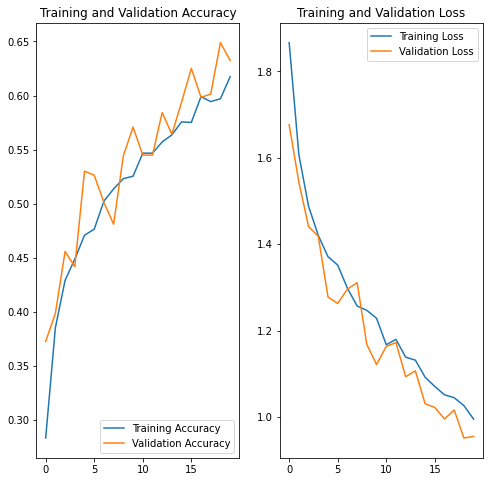

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The validation accuracy is increased but training accuracy is decreased.It indicates the model is underfit.so increasing the data points might reduce underfit

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [57]:
import tensorflow_datasets as tfds
fd1=f=tfds.folder_dataset.ImageFolder(data_dir_train).info

In [58]:
df=tfds.as_dataframe(train_ds,fd1)

In [59]:
df.columns

Index(['image', 'label'], dtype='object')

In [60]:
df2=pd.DataFrame(columns=['labels'])

In [61]:
df2['labels']=df['label']

In [62]:
df3=df2.explode(column='labels')

In [65]:
import plotly.express as px

In [66]:
fig = px.histogram(df3, x="labels")
fig.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
label 2 (basal cell carcinoma)has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?

label 5(nevus) more number of samples 773

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [14]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [15]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0BD076CD0>: 100%|██████████| 500/500 [00:22<00:00, 21.98 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE0BC842890>: 100%|██████████| 500/500 [00:20<00:00, 24.61 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0BD3FC750>: 100%|██████████| 500/500 [00:20<00:00, 24.41 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FE0BD0B9BD0>: 100%|██████████| 500/500 [01:52<00:00,  4.44 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7FE0BD128D50>: 100%|██████████| 500/500 [01:32<00:00,  5.42 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0BD44A650>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE159A065D0>: 100%|██████████| 500/500 [00:47<00:00, 10.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0BD08A350>: 100%|██████████| 500/500 [00:20<00:00, 24.69 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0BD0A6A50>: 100%|██████████| 500/500 [00:19<00:00, 25.30 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [17]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [20]:
import glob
import os
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029967.jpg_291b971c-9786-4a45-a14b-ab00871dde06.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030011.jpg_bf3e3fba-5e22-4999-8df0-0c77ffb33efa.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030757.jpg_5a0c2f23-6395-4aad-813e-f83716c33fd4.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025504.jpg_f0d257e6-ff02-464b-bf90-7bc5bebfaddb.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027598.jpg_2ded36d1-1e6d-4a20-8e53-13691df088a2.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

In [21]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [23]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [25]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [26]:
df2['Label'].value_counts()

dermatofibroma                500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
nevus                         500
pigmented benign keratosis    500
actinic keratosis             500
basal cell carcinoma          500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [27]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [28]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [29]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [30]:
model=tf.keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip('horizontal'),
                  layers.experimental.preprocessing.RandomRotation(0.2),
                  layers.experimental.preprocessing.Rescaling(1./255),
                  layers.Conv2D(16, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.Dropout( 0.2), 
                  layers.MaxPooling2D(),
                  layers.Flatten(),
                  layers.Dense(128, activation='relu'),
                  layers.Dropout( 0.2),
                  layers.Dense(32, activation='relu'),
                  layers.Dense(num_classes,activation='softmax')
                           ])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [32]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 214s 1s/step - loss: 2.0202 - accuracy: 0.2112 - val_loss: 1.8300 - val_accuracy: 0.2784
Epoch 2/30
169/169 [==============================] - 204s 1s/step - loss: 1.7450 - accuracy: 0.3168 - val_loss: 1.7342 - val_accuracy: 0.3474
Epoch 3/30
169/169 [==============================] - 205s 1s/step - loss: 1.5904 - accuracy: 0.3902 - val_loss: 1.5280 - val_accuracy: 0.4061
Epoch 4/30
169/169 [==============================] - 205s 1s/step - loss: 1.5074 - accuracy: 0.4225 - val_loss: 1.4918 - val_accuracy: 0.4246
Epoch 5/30
169/169 [==============================] - 203s 1s/step - loss: 1.4376 - accuracy: 0.4471 - val_loss: 1.3536 - val_accuracy: 0.4781
Epoch 6/30
169/169 [==============================] - 203s 1s/step - loss: 1.3768 - accuracy: 0.4683 - val_loss: 1.3443 - val_accuracy: 0.4796
Epoch 7/30
169/169 [==============================] - 203s 1s/step - loss: 1.3509 - accuracy: 0.4803 - val_loss: 1.3848 - val_accuracy: 0.4625

#### **Todo:**  Visualize the model results

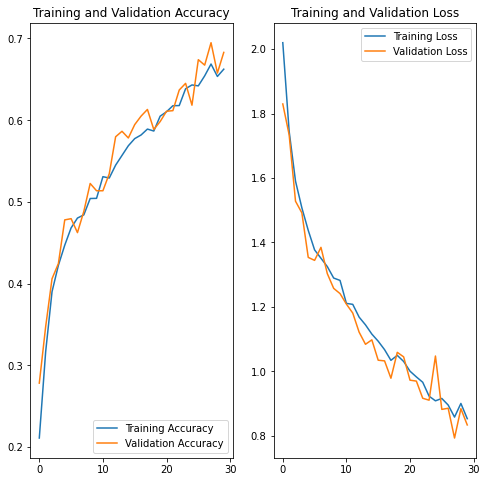

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
dataset the model overfitting/underfitting was eliminated.The taining accuracy and losses are almost equal with the validation accuracy and losses
